In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv


In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style

In [4]:
#pd
data = pd.read_csv("/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
data.shape

(693071, 57)

In [6]:
data.sample(5).T

,306680,532191,193737,561218,631235
id,665b2e79-b963-41a3-9afd-a3dd170ac9d4,72703408-c9a9-44fa-a3dd-e1c76a2468d0,558fdfa7-8412-4089-a391-5398549a0b3d,37a64076-3d7a-4536-9c49-d8e6a96930ef,29ed9ca3-ab98-4b0c-a015-26403268944c
timestamp,1543663676.0,1544715913.0,1543548177.0,1545084611.0,1545127812.0
hour,11,15,3,22,10
day,1,13,30,17,18
month,12,12,11,12,12
datetime,2018-12-01 11:27:55,2018-12-13 15:45:13,2018-11-30 03:22:56,2018-12-17 22:10:10,2018-12-18 10:10:11
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Boston University,North Station,Boston University,Beacon Hill,South Station
destination,North Station,North End,West End,Northeastern University,Theatre District
cab_type,Lyft,Uber,Uber,Uber,Uber


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
numerical = data.select_dtypes(["float64","int64"]).columns
numerical

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [9]:
categorical = data.select_dtypes(["object"]).columns
categorical

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [10]:
len(categorical) + len(numerical) == len(data.columns)

True

In [11]:
for col in categorical:
    print('{} : {} unique values'.format(col, data[col].nunique()))

id : 693071 unique values
datetime : 31350 unique values
timezone : 1 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
product_id : 13 unique values
name : 13 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


timezone : 1 unique values

In [12]:
data = data.drop(columns=["id", "timestamp", "timezone", "product_id"])

In [13]:
data.duplicated().sum()

1493

In [14]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicated rows: ", duplicate_rows_data.shape)

number of duplicated rows:  (1493, 53)


In [15]:
data = data.drop_duplicates()
data.shape

(691578, 53)

In [16]:
data.isnull().sum()

hour                               0
day                                0
month                              0
datetime                           0
source                             0
destination                        0
cab_type                           0
name                               0
price                          54542
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

In [17]:
data  = data.dropna()

In [18]:
data.isnull().sum()

hour                           0
day                            0
month                          0
datetime                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

No null values anymore 

In [19]:
numerical = data.select_dtypes(["float64","int64"]).columns
numerical

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [20]:
categorical = data.select_dtypes(["object"]).columns
categorical

Index(['datetime', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [21]:
for col in categorical:
    print('{} : {} unique values'.format(col, data[col].nunique()))

datetime : 31350 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
name : 12 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


### Create 'START_DATE'

In [22]:
data['datetime'].head()

0    2018-12-16 09:30:07
1    2018-11-27 02:00:23
2    2018-11-28 01:00:22
3    2018-11-30 04:53:02
4    2018-11-29 03:49:20
Name: datetime, dtype: object

In [23]:

data["START_DATE"] = pd.to_datetime(data['datetime'], format='%Y/%m/%d %H:%M')

In [24]:
data["START_DATE"].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: START_DATE, dtype: datetime64[ns]

### extract hours, day and month, weekday and day of week from START_DATE

In [25]:
data['HOURS'] = [x.hour for x in data['START_DATE']]
data['DAY'] = [x.day for x in data['START_DATE']]
data['MONTH'] = [x.month for x in data['START_DATE']]
data['DAY_OF_WEEK'] = [x.day_of_week for x in data['START_DATE']]
data["WEEKDAY"] = [calendar.day_name[x.day_of_week] for x in data['START_DATE']]

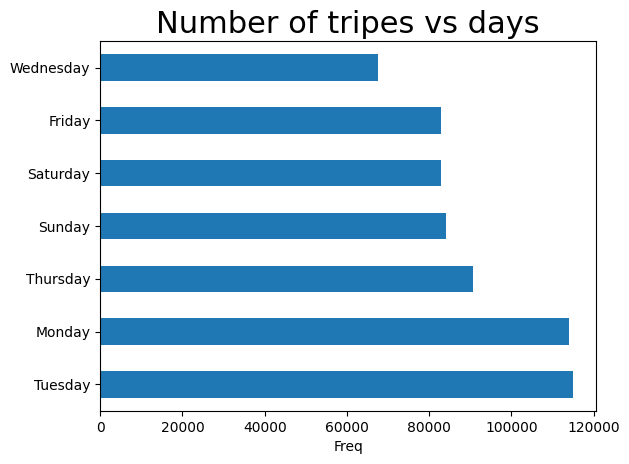

In [26]:

data["WEEKDAY"].value_counts().plot(kind='barh')
plt.xlabel("Freq")
plt.title("Number of tripes vs days", fontsize=22)
plt.show()

### create column named HourRange to group hours



In [27]:
data['hourRange'] = data.hour.apply( 
                    lambda x: ('00 - 03 am' if 0<=x<=3 else 
                    ('04 - 07 am' if  4<=x<=7 else 
                    ('08 - 11 am' if  8<=x<=11 else 
                    ('12 - 15 am' if 12<=x<=15 else 
                    ('16 - 19 am' if 16<=x<=19 else 
                    ('20 - 23 am' if 20<=x<=723 else 
                    'missed')))))))
data["hourRange"].sample(10)

402847    00 - 03 am
5995      16 - 19 am
218349    16 - 19 am
188176    04 - 07 am
132413    12 - 15 am
690921    12 - 15 am
412112    12 - 15 am
661739    20 - 23 am
590286    12 - 15 am
240730    00 - 03 am
Name: hourRange, dtype: object

In [28]:
data.sample(3)

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,START_DATE,HOURS,DAY,MONTH,DAY_OF_WEEK,WEEKDAY,hourRange
131149,23,1,12,2018-12-01 23:33:02,Haymarket Square,Theatre District,Uber,Black,16.0,1.16,...,1543658400,44.09,1543690800,2018-12-01 23:33:02,23,1,12,5,Saturday,20 - 23 am
578836,9,28,11,2018-11-28 09:35:07,Haymarket Square,Theatre District,Uber,WAV,9.5,1.16,...,1543399200,36.77,1543438800,2018-11-28 09:35:07,9,28,11,2,Wednesday,08 - 11 am
532580,0,18,12,2018-12-18 00:10:14,Boston University,North Station,Uber,WAV,10.5,3.39,...,1545044400,35.91,1545076800,2018-12-18 00:10:14,0,18,12,1,Tuesday,00 - 03 am


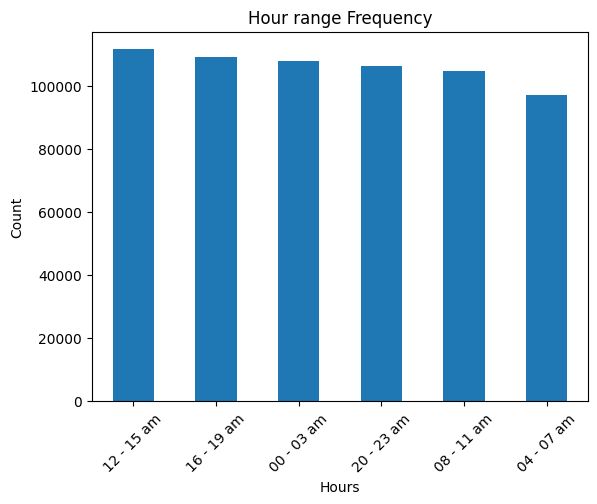

In [29]:
data["hourRange"].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Hours')
plt.xticks(rotation=45)
plt.title('Hour range Frequency')

plt.show()

### remove collinear variables

In [30]:
numerical = data.select_dtypes(['int64', 'float64']).columns 

<AxesSubplot: >

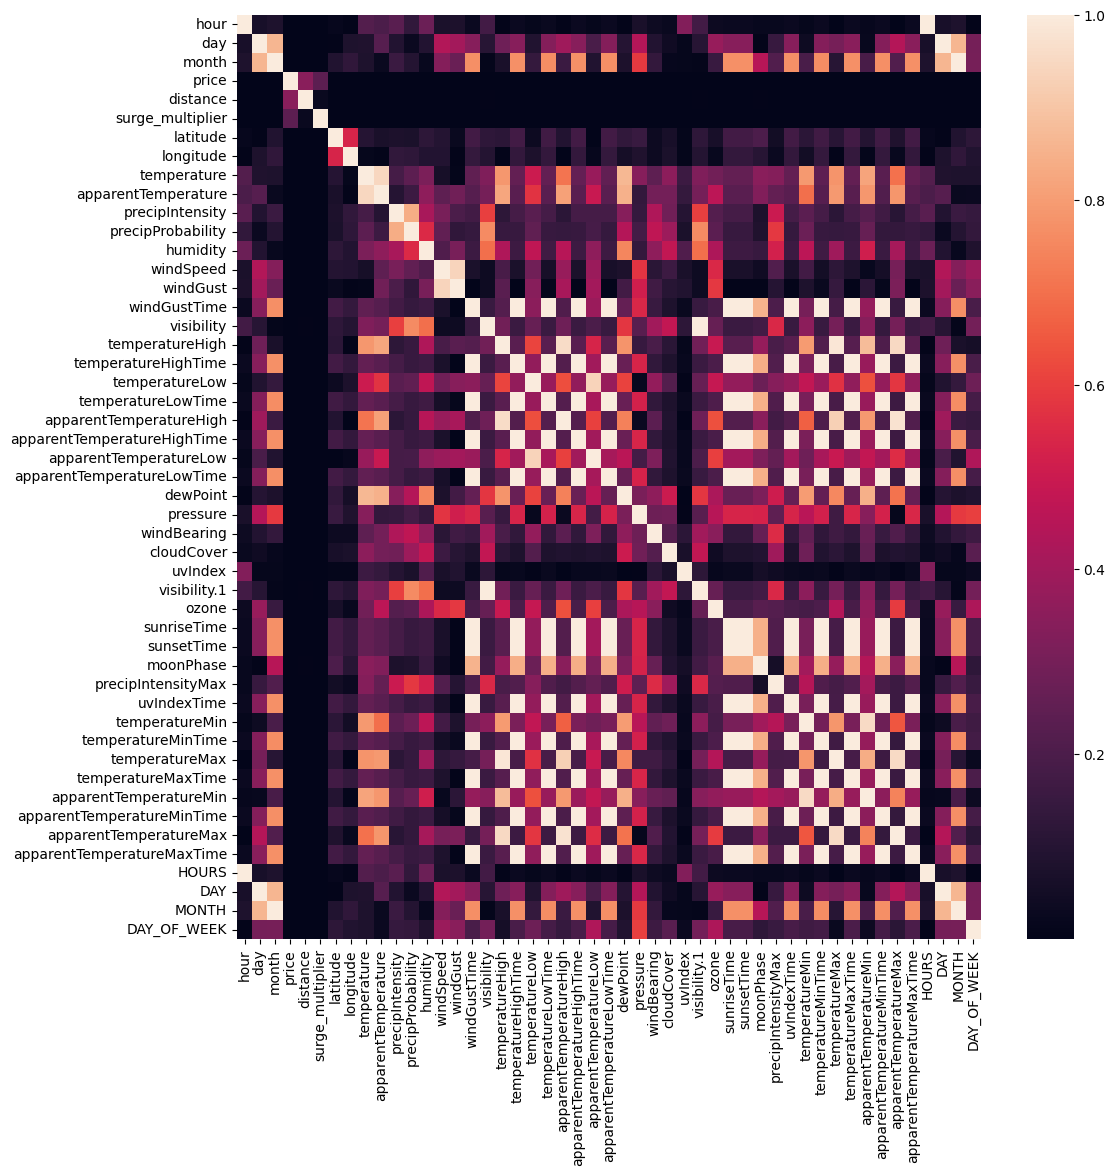

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr().abs())

There are a mot of cases where the correlation equal to one . We need to remove one of each of those Columns . Because they do almost the same role.

In [32]:
# Threshold for removing correlated variables
threshold = 0.9
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold) ]
print('There are %d columns to remove.' % (len(to_drop)))
to_drop

There are 22 columns to remove.


['apparentTemperature',
 'windGust',
 'temperatureHighTime',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'visibility.1',
 'sunriseTime',
 'sunsetTime',
 'uvIndexTime',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'HOURS',
 'DAY',
 'MONTH']

In [33]:
data = data.drop(columns = to_drop)
print('data shape after removing collinear vaiables: ', data.shape)

data shape after removing collinear vaiables:  (637036, 38)


In [34]:
data.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,START_DATE,DAY_OF_WEEK,WEEKDAY,hourRange
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,0.72,0,303.8,0.30,0.1276,39.89,2018-12-16 09:30:07,6,Sunday,08 - 11 am
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1.00,0,291.1,0.64,0.1300,40.49,2018-11-27 02:00:23,1,Tuesday,00 - 03 am
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,0.03,0,315.7,0.68,0.1064,35.36,2018-11-28 01:00:22,2,Wednesday,00 - 03 am
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.00,0,291.1,0.75,0.0000,34.67,2018-11-30 04:53:02,4,Friday,04 - 07 am
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.44,0,347.7,0.72,0.0001,33.10,2018-11-29 03:49:20,3,Thursday,00 - 03 am


## Handling outliers

In [35]:
# der ouliers(col):
    
#     Q3 = data[col].quantile(0.75)
#     Q1 = data[col].quantile(0.25)
#     IQR = Q3-Q1
#     upper_limit = Q3 + (IQR*1.5)
#     lower_limit = Q1 - (IQR*1.5)
#     df1 = data[ (data[col] > upper_limit) | (data[col] < lower_limit)] 
#     data.loc[ (data[col] > upper_limit) | (data[col] < lower_limit),col]=np.nan

SyntaxError: invalid syntax (1301529715.py, line 1)

In [ ]:
data['hour'].quantile(0.75)

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

In [ ]:
df.loc[data['name']=="Alfred", 'name'] = np.nan
df